In [66]:
#Q1-B
import numpy as np

scores = np.array([65, 70, 68, 73, 75, 80, 85, 78, 90, 100])

n_bootstrap = 40
bootstrap_means = []

for _ in range(n_bootstrap):
    sample = np.random.choice(scores, size=len(scores), replace=True)
    bootstrap_means.append(np.mean(sample))

lower_percentile = np.percentile(bootstrap_means, 2.5)
upper_percentile = np.percentile(bootstrap_means, 97.5)

print(f"95% Confidence Interval: [{lower_percentile}, {upper_percentile}]")


95% Confidence Interval: [73.39500000000001, 84.42750000000001]


In [67]:
#Q2-A
import numpy as np

scores = np.array([65, 70, 68, 73, 75, 80, 85, 78, 90, 100])
np.random.shuffle(scores)

subsets = [scores[i:i+2] for i in range(0, len(scores), 2)]

print(subsets)


[array([65, 68]), array([80, 85]), array([75, 78]), array([ 70, 100]), array([73, 90])]


In [68]:
#Q3-A
import pandas as pd
from ISLP import load_data

OJ = load_data("OJ")
OJ['Store7'] = pd.to_numeric(OJ['Store7'], errors='coerce')

train_data = OJ.sample(n=800, random_state=42)
test_data = OJ.drop(train_data.index)

print("Training Data Sample:")
print(train_data.head())

print("\nTest Data Sample:")
print(test_data.head())



Training Data Sample:
    Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
644       CH             239        3     1.79     2.23     0.0     0.0   
629       MM             260        2     1.86     2.18     0.0     0.7   
70        CH             274        4     1.99     2.09     0.0     0.4   
962       CH             227        1     1.69     1.69     0.0     0.0   
787       CH             273        3     1.99     2.09     0.0     0.4   

     SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  \
644          0          0  0.670149         2.23         1.79       0.44   
629          0          0  0.456000         1.48         1.86      -0.38   
70           0          0  0.718311         1.69         1.99      -0.30   
962          0          0  0.600000         1.69         1.69       0.00   
787          0          0  0.053687         1.69         1.99      -0.30   

     Store7  PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
644     NaN 

In [69]:
#Q3-B
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

X_train = train_data.drop('Purchase', axis=1)
y_train = train_data['Purchase']

tree_model = DecisionTreeClassifier(max_leaf_nodes=6, random_state=42)
tree_model.fit(X_train, y_train)

y_train_pred = tree_model.predict(X_train)

cm_train = confusion_matrix(y_train, y_train_pred)

misclassification_train = 1 - np.trace(cm_train) / np.sum(cm_train)

print("Confusion Matrix (Training Data):\n", cm_train)
print(f"Misclassification Error (Training Data): {misclassification_train}")



Confusion Matrix (Training Data):
 [[394 100]
 [ 41 265]]
Misclassification Error (Training Data): 0.17625000000000002


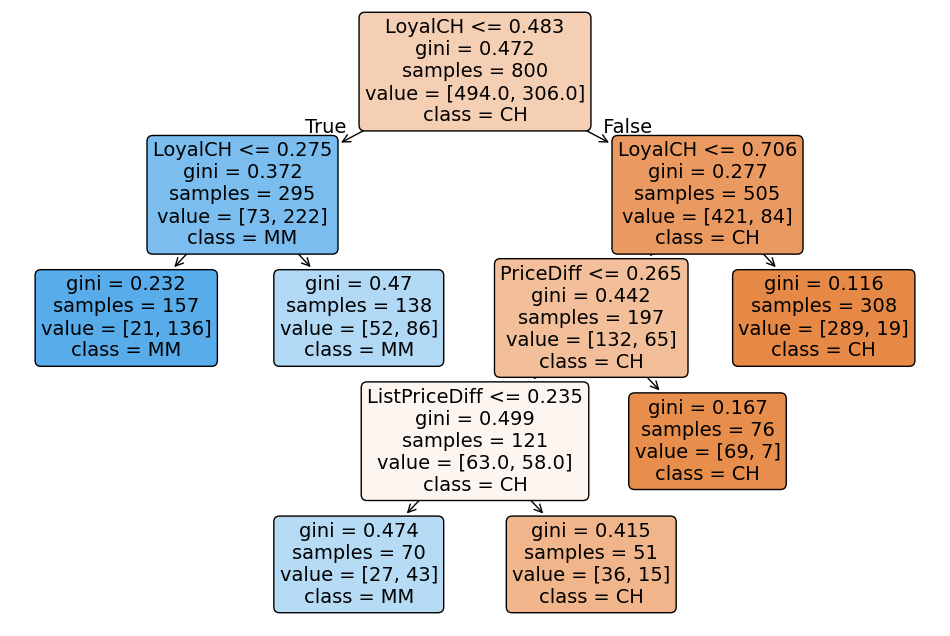

In [70]:
#Q3-C
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=y_train.unique(), rounded=True)
plt.show()



In [71]:
#Q3-D
X_test = test_data.drop('Purchase', axis=1)
y_test = test_data['Purchase']
y_test_pred = tree_model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
misclassification_test = 1 - np.trace(cm_test) / np.sum(cm_test)

print("Confusion Matrix (Test Data):\n", cm_test)
print(f"Misclassification Error (Test Data): {misclassification_test}")



Confusion Matrix (Test Data):
 [[128  31]
 [ 14  97]]
Misclassification Error (Test Data): 0.16666666666666663


In [72]:
#Q3-E
tree_model_8 = DecisionTreeClassifier(max_leaf_nodes=8, random_state=42)
tree_model_8.fit(X_train, y_train)
y_test_pred_8 = tree_model_8.predict(X_test)
cm_test_8 = confusion_matrix(y_test, y_test_pred_8)
misclassification_test_8 = 1 - np.trace(cm_test_8) / np.sum(cm_test_8)

print("Confusion Matrix (Test Data, 8 leaf nodes):\n", cm_test_8)
print(f"Misclassification Error (Test Data, 8 leaf nodes): {misclassification_test_8}")


Confusion Matrix (Test Data, 8 leaf nodes):
 [[139  20]
 [ 20  91]]
Misclassification Error (Test Data, 8 leaf nodes): 0.14814814814814814


#Q3-F
If the test error increases when using 8 leaf nodes, it suggests overfitting. If the error decreases or stays similar, it indicates no overfitting.
Overfitting: The model fits the training data too well and doesn't generalize to the test data.

In [73]:
#Q3-G
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes': np.arange(2, 20)}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Number of Leaf Nodes: {grid_search.best_params_['max_leaf_nodes']}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")



Best Number of Leaf Nodes: 11
Best Cross-Validation Score: 0.80625


In [74]:
#Q3-H
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred_rf = rf_model.predict(X_test)
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)

misclassification_test_rf = 1 - np.trace(cm_test_rf) / np.sum(cm_test_rf)

print("Confusion Matrix (Random Forest Test Data):\n", cm_test_rf)
print(f"Misclassification Error (Random Forest Test Data): {misclassification_test_rf}")



Confusion Matrix (Random Forest Test Data):
 [[131  28]
 [ 26  85]]
Misclassification Error (Random Forest Test Data): 0.19999999999999996


In [75]:
#Q3-I
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

OJ['Store7'] = pd.to_numeric(OJ['Store7'], errors='coerce') 
OJ = OJ.dropna() 

X_train = train_data.drop('Purchase', axis=1)
y_train = train_data['Purchase']

print(X_train.dtypes)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2']  
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  
    verbose=1,  
    error_score='raise'  
)

rf_grid_search.fit(X_train, y_train)
print(f"Best Random Forest Hyperparameters: {rf_grid_search.best_params_}")
print(f"Best Random Forest Cross-Validation Score: {rf_grid_search.best_score_}")

WeekofPurchase      int64
StoreID             int64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH           int64
SpecialMM           int64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
Store7            float64
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE               int64
dtype: object
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
Best Random Forest Cross-Validation Score: 0.8012499999999999


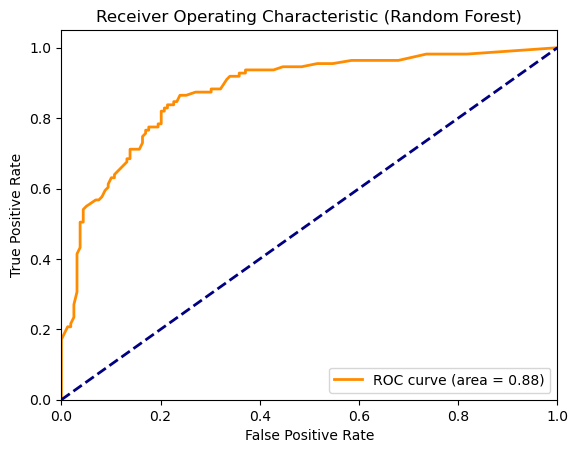

In [76]:
#Q3-J
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_encoded, y_probs_rf)  
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()




In [77]:
#Q3-K
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import numpy as np


print("Missing values in 'Store7' in training set:", X_train['Store7'].isnull().sum())
print("Missing values in 'Store7' in test set:", X_test['Store7'].isnull().sum())

X_train = X_train.drop(columns=['Store7']) 
X_test = X_test.drop(columns=['Store7'])
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_imputed, y_train)
y_test_pred_gb = gb_model.predict(X_test_imputed)
cm_test_gb = confusion_matrix(y_test, y_test_pred_gb)
misclassification_test_gb = 1 - np.trace(cm_test_gb) / np.sum(cm_test_gb)

print("Confusion Matrix (Gradient Boosting Test Data):\n", cm_test_gb)
print(f"Misclassification Error (Gradient Boosting Test Data): {misclassification_test_gb}")



Missing values in 'Store7' in training set: 800
Missing values in 'Store7' in test set: 270
Confusion Matrix (Gradient Boosting Test Data):
 [[136  23]
 [ 23  88]]
Misclassification Error (Gradient Boosting Test Data): 0.1703703703703704


In [78]:
#Q3-L
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train_imputed, y_train)

print(f"Best Gradient Boosting Hyperparameters: {gb_grid_search.best_params_}")
print(f"Best Gradient Boosting Cross-Validation Score: {gb_grid_search.best_score_}")




Best Gradient Boosting Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Best Gradient Boosting Cross-Validation Score: 0.8125


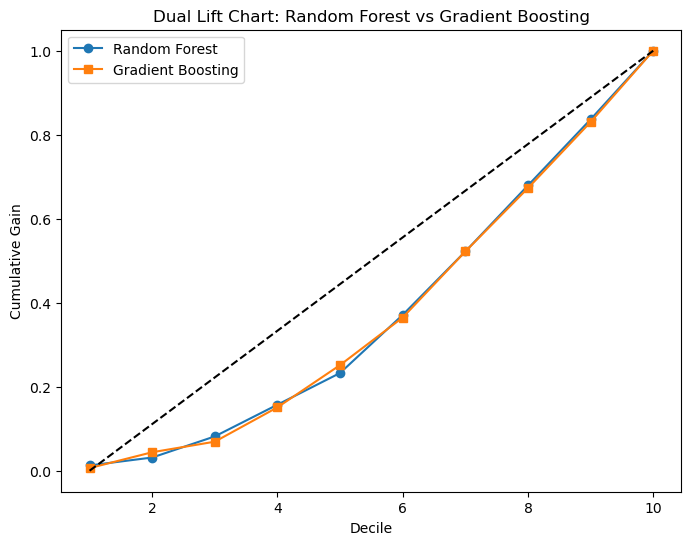

In [79]:
#Q3-M
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42) 
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=42)  
gb_model.fit(X_train, y_train)

y_probs_rf = rf_model.predict_proba(X_test)[:, 1]  
y_probs_gb = gb_model.predict_proba(X_test)[:, 1]  

lift_rf = pd.DataFrame({'actual': y_test, 'prob': y_probs_rf})
lift_rf['actual'] = (lift_rf['actual'] == 'CH').astype(int)  
lift_rf = lift_rf.sort_values(by='prob', ascending=False).reset_index(drop=True)
lift_rf['decile'] = pd.qcut(lift_rf.index, 10, labels=False)

lift_gb = pd.DataFrame({'actual': y_test, 'prob': y_probs_gb})
lift_gb['actual'] = (lift_gb['actual'] == 'CH').astype(int)  
lift_gb = lift_gb.sort_values(by='prob', ascending=False).reset_index(drop=True)
lift_gb['decile'] = pd.qcut(lift_gb.index, 10, labels=False)

gain_rf = lift_rf.groupby('decile')['actual'].sum().cumsum() / lift_rf['actual'].sum()
gain_gb = lift_gb.groupby('decile')['actual'].sum().cumsum() / lift_gb['actual'].sum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), gain_rf, marker='o', label='Random Forest')
plt.plot(range(1, 11), gain_gb, marker='s', label='Gradient Boosting')
plt.plot([1, 10], [0, 1], '--', color='black')  
plt.title("Dual Lift Chart: Random Forest vs Gradient Boosting")
plt.xlabel('Decile')
plt.ylabel('Cumulative Gain')
plt.legend()
plt.show()


